In [1]:
# This code will extend the previous perceptron example to use multi layer NN to solve the problem

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
# Very simple neural network that works on classifying things from the wheat and seeds dataset 
"""In general there are X stages we go through to make a fully functional neural network:
1) Initialise the network 
2) Forward Propagate
3) Back Propagate the error
4) Train Network (i.e. update the weights with training data)
5) Predict on test data
"""


'In general there are X stages we go through to make a fully functional neural network:\n1) Initialise the network \n2) Forward Propagate\n3) Back Propagate the error\n4) Train Network (i.e. update the weights with training data)\n5) Predict on test data\n'

In [4]:
# define input features
np.random.seed(1)
num = 10000
# Creating a random array of x , y points 
x = np.random.randn(num)*50
y = np.random.randn(num)*50
# Defining a cut off line to split the points into two sections 
x_line = np.linspace(-150,150,x.size)
y_line = (1.5*x_line-25)

In [5]:
# Generating a third column based on the position of the points on the 2D grid
u = np.zeros((len(x),1))
u[(1.5*x-25 > y)] = 1

In [6]:
# Concatenating x,y,z into the fully labelled dataset
x = x.reshape(x.size,1)
y = y.reshape(y.size,1)
u = u.reshape(u.size,1)
data = np.concatenate([x,y,u],axis=1)
# Extracting test data from the full dataset
# Specifying a percentage of the full dataset
train_perc = 0.1
# Extracting training data
train_data = data[0:round(len(data)*train_perc/100),:]
# Extracting test data
test_data = data[round(len(data)*train_perc/100)::,:]

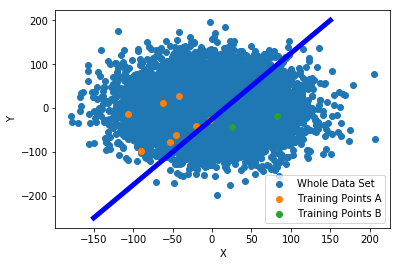

In [7]:
# Plotting training data
# Points in group A
td1 = train_data[(train_data[:,2]==0)] 
# Points in group B 
td2 = train_data[(train_data[:,2]==1)] 

# Plotting 
plt.scatter(x,y,label='Whole Data Set')
plt.scatter(td1[:,0],td1[:,1],label='Training Points A')
plt.scatter(td2[:,0],td2[:,1],label='Training Points B')
plt.plot(x_line,y_line,'b',linewidth=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [8]:
# Extracting input features from test data (i.e. x,y locations)
input_feats = train_data[:,(0,1)].reshape(2,len(train_data))

In [34]:
input_feats.shape

(2, 10)

In [9]:
# Defining expected outputs (i.e. 0/1 depending on where the points lie)
target = train_data[:,2]
target = target.reshape(1,input_feats.shape[1])

In [46]:
# Initialising network 
def init_network(structure):
    
    np.random.seed(1)
    
    """Takes in 4 variables: Number of inputs, number of neurons in hidden layer 1, number of neurons in hidden
       layer 2, number of outputs and creates the weights and bias matrices"""
    # Number of layers
    layers = len(structure)
    # Creating weights and biases lists to be filled in loop 
    weights = []
    biases = []
    
    for i in range(1,layers):
        # Creating weights and biases matrices for each layer
        weights.append([np.random.randn(structure[i-1], structure[i])])
        biases.append([np.random.randn(structure[i])])

        # Fixing shapes of arrays in the list 
        weights[i-1] = np.array(weights[i-1]).reshape(structure[i-1], structure[i])
        biases[i-1] = np.array(biases[i-1]).reshape(1,structure[i])

    print ("WEIGHTS :")
    print (weights)
    print ("BIASES : ")
    print (biases)
    
    return (weights, biases)

In [47]:
# Creating NN structure
n_in = 2 # Number of input Ns
n_hid = 5 # Number of Ns in hidden layer 1
n_hid2 = 3 # Number of Ns in hidden layer 2
n_out = 1 # Number of Ns in output layer

# Structure list for the looping through in FF and BP
structure = [n_in, n_hid, n_hid2, n_out]

In [48]:
test_weights, test_biases = init_network(structure)

WEIGHTS :
[array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763],
       [-2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038]]), array([[-1.09989127, -0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521, -1.10061918],
       [ 1.14472371,  0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786, -0.12289023],
       [-0.93576943, -0.26788808,  0.53035547]]), array([[-0.84520564],
       [-0.67124613],
       [-0.0126646 ]])]
BIASES : 
[array([[ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944]]), array([[-0.69166075, -0.39675353, -0.6871727 ]]), array([[-1.11731035]])]


In [49]:
# Sigmoid activation function 
def sigmoid(X): 
    out = 1/(1+np.exp(-X))
    return out 

In [50]:
# Derivative of sigmoid activation function (used in the gradient descent back propagation)
def sigmoid_der(X):  
    out = sigmoid(X)*(1-sigmoid(X))
    return out

In [51]:
# Feed forward 
def feed_forward(input_feats, weights, biases, structure):
    
    """Feed forward part of the NN. Outputs 3 things: 
     - y_hat = output of final layer 
     - a = activated outputs of all layers 
     - z = raw outputs of all layers"""
    
    layers = len(structure)
    num = input_feats.shape[1]
    # Creating a and z lists to be filled in loop
    a = []
    z = []
    layer_output = input_feats
    for i in range(0,layers-1):
        z.append(np.dot(layer_output,weights[i])+biases[i])
        # Fixing shapes of arrays in the list 
        #z[i] = np.array(z[i]).reshape(structure[i+1],num)
        a.append(sigmoid(z[i]))
        # Fixing shapes of arrays in the list 
        #a[i] = np.array(a[i]).reshape(structure[i+1],num)
        layer_output = a[i]
        
    return (layer_output,a,z)

In [52]:
y_hat, a, z = feed_forward(input_feats, test_weights, test_biases, structure)

ValueError: shapes (2,10) and (2,5) not aligned: 10 (dim 1) != 2 (dim 0)

In [18]:
print (y_hat)

[[0.12523256 0.15796157 0.15788107 0.12554727 0.14085028 0.15785576
  0.14313883 0.14313873 0.14085028 0.14085027]]


In [19]:
# Computing cost using MSE
def compute_cost(y_hat, target):
    num = len(y_hat)
    print (y_hat)
    print (target)
    cost = np.sum(pow(y_hat-target,2))/num
    print (cost)
    return cost

In [20]:
def back_propagation(a, target, structure, weights, biases, input_feats):    
    """Implementing the backpropagation"""
    delta = np.zeros_like(weights)   
    layer_error = np.zeros_like(weights)
    num = input_feats.shape[1]
 
    for i in reversed(range(0,len(structure)-1)):
        layer_output = a[i]
        # If its the last layer in the error in that layer = diff 
        if i == len(structure)-2: 
            # difference between yhat and y 
            layer_error[i] = (target - layer_output)
            # Derivative to backward propagate
            delta[i] = (layer_error[i] * sigmoid_der(layer_output))
        # If the layer isnt the last layer the delta is slightly different 
        else: 
            layer_error[i] = (np.dot(weights[i+1].T,delta[i+1]))
            delta[i] = (layer_error[i] * sigmoid_der(layer_output))

    return delta

In [21]:
delta = back_propagation(a, target, structure, test_weights, test_biases, input_feats)

In [26]:
def update_params(weights, bias, delta, structure, input_feats, a, l_rate):
    """Inputs: weights, biases, delta (gradient), structure of network, input features, a (output of each layer)
    , learning rate)
    Outputs: weights, bias"""
    # Updating weights 
    for i in range(0,len(structure)-1):
        if i == 0: 
            input_to_use = input_feats
        else: 
            input_to_use = a[i-1]
        # Update weights
        weights[i] -= (np.dot(delta[i], input_to_use.T)*l_rate)
        # Update bias
        d_bias = np.sum(delta[i],axis=1).reshape(bias[i].shape)
        bias[i] -= (d_bias*l_rate)
    
    return weights, bias

In [27]:
def train(input_feats, weights, biases, target, epoch, l_rate):
    
    cost = np.zeros((epoch,1))    
    weights_run = np.copy(weights)
    biases_run = np.copy(biases)
    
    for epoch in np.arange(0,epoch):
        # Feed forward 
        y_hat, a, z = feed_forward(input_feats, weights_run, biases_run, structure) 
        # Calculating cost value for the network 
        cost[epoch] = compute_cost(y_hat, target)
        # Backpropagation
        delta = back_propagation(a, target, structure, weights_run, biases_run, input_feats)
        # Update params
        weights_run, bias_run = update_params(weights_run, biases_run, delta, structure, input_feats, a, l_rate)
        
    return cost, weights_run, bias_run

In [32]:
epoch = 100
epochs = range(epoch)
# Normalising inputs to ensure stability
norm_input = (input_feats)/np.max(input_feats)
cost, weights_run , bias_run = train(norm_input, test_weights, test_biases, target, epoch, l_rate = 0.1)



[[0.12865125 0.13113119 0.13475581 0.12829184 0.11860993 0.13326378
  0.12689801 0.12549293 0.12177304 0.11982623]]
[[0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]]
1.6508508805924371
[[0.12518211 0.12785492 0.13135005 0.12483406 0.11538169 0.12986161
  0.12333728 0.12201064 0.11851213 0.11656677]]
[[0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]]
1.6564197228397002
[[0.12162424 0.12448476 0.12784828 0.12128779 0.11207215 0.12636474
  0.11969194 0.11844422 0.11516661 0.11322519]]
[[0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]]
1.6623520589060448
[[0.1179826  0.12102489 0.12425471 0.11765797 0.10868636 0.12277751
  0.11596742 0.11479896 0.11174138 0.10980653]]
[[0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]]
1.6686566646267451
[[0.11426296 0.11748027 0.1205744  0.11395039 0.10523013 0.11910509
  0.11216998 0.111081   0.10824209 0.10631663]]
[[0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]]
1.6753398382022855
[[0.11047196 0.11385666 0.11681321 0.11017166 0.10171006 0.11535346
  0.10830678 0.10729731 0.10467521 0.10276209]]
[[0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]]
1.682

Text(0, 0.5, 'Cost')

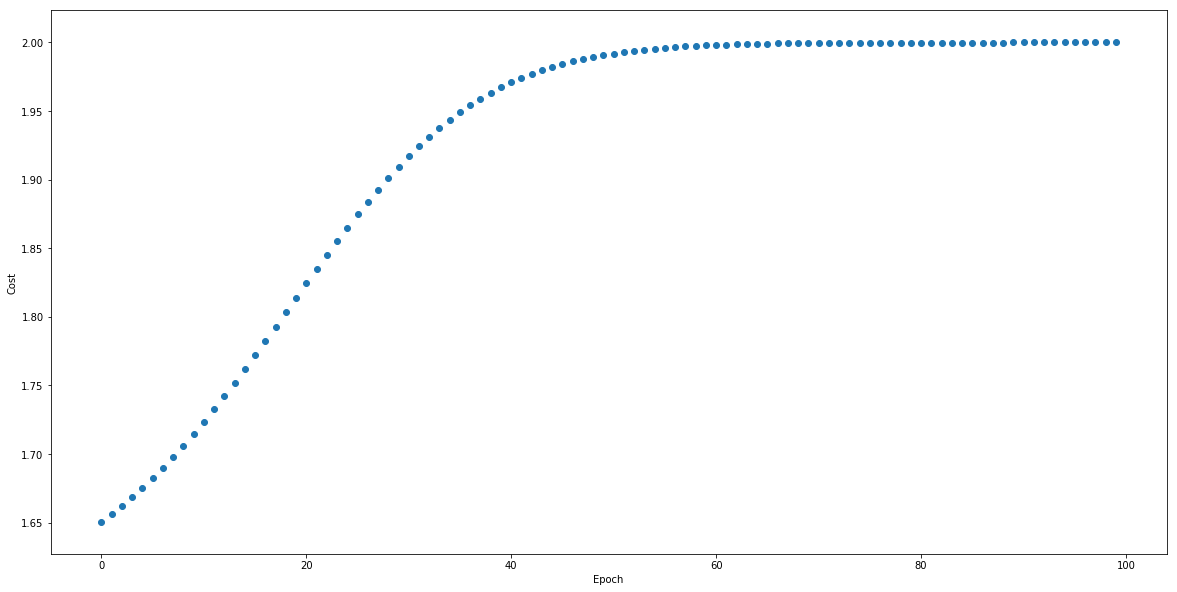

In [33]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(epochs,cost)
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [ ]:
print (weights_run)
print (bias_run)

In [ ]:
# Testing on data

In [ ]:
test_row = 2780
test = test_data[test_row,:]
test_point = test_data[test_row,(0,1)] 
print ("Test point = (%s, %s), Expected output = %s" %(test_data[test_row,0],test_data[test_row,1],test_data[test_row,2]))

In [ ]:
# test_features 
test_feats = test_data[:,(0,1)]
norm_test_feats = test_feats/np.max(test_feats)
test_target = test_data[:,2]


In [ ]:
# Forward propagating
a = np.dot(norm_test_feats, weights_run) + bias_run

# Activation function 
z_train = sigmoid(a)

In [ ]:
test_target = test_target.reshape(len(test_feats),1)
#z_train = z_train.reshape(9000,1)
print (np.concatenate([test_target,z_train,test_target - z_train],axis=1))

In [ ]:
round_train = np.round(z_train)
error = (test_target - z_train)
round_error = (np.round(error))
MSE = np.sum(pow(round_error,2))/len(test_data)
MAE = np.mean(abs(round_error))
print ("MSE = %s"%(MSE))
print ("MAE = %s"%(MAE))

In [ ]:
# Getting correct predictions
correct = test_target[(test_target==round_train)]
incorrect = test_target[(test_target!=round_train)]
accuracy = (len(correct)/len(test_target))*100
print ("Accuracy = %s percent"%(accuracy))